In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [97]:
df = pd.read_csv('result_7_30.csv')

In [98]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [99]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [100]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [101]:
True_Duplication['Replicate']=[i for i in range(98)]
O_Duplication['Replicate']=[i for i in range(98)]
ETE3_Duplication['Replicate']=[i for i in range(98)]


In [102]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconcILS' for i in range(98)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [103]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['ETE3' for i in range(98)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [104]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,1,1,reconcILS
1,0,0,reconcILS
2,0,-1,reconcILS
3,6,0,reconcILS
4,1,2,reconcILS
...,...,...,...
93,0,1,reconcILS
94,2,2,reconcILS
95,1,1,reconcILS
96,0,0,reconcILS


In [105]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,1,2,ETE3
1,0,2,ETE3
2,0,-2,ETE3
3,4,-2,ETE3
4,0,-1,ETE3
...,...,...,...
93,0,0,ETE3
94,1,-1,ETE3
95,0,-2,ETE3
96,0,0,ETE3


In [106]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [107]:
val

54

In [108]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,1
1,reconcILS,Duplication,0
2,reconcILS,Duplication,0
3,reconcILS,Duplication,6
4,reconcILS,Duplication,1
...,...,...,...
387,ETE3,Loss,0
388,ETE3,Loss,-1
389,ETE3,Loss,-2
390,ETE3,Loss,0


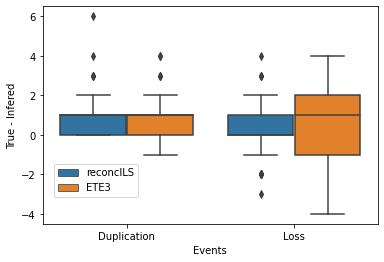

In [109]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.png', dpi=500)


In [110]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,1,2,ETE3
1,0,2,ETE3
2,0,-2,ETE3
3,4,-2,ETE3
4,0,-1,ETE3
...,...,...,...
93,0,0,ETE3
94,1,-1,ETE3
95,0,-2,ETE3
96,0,0,ETE3


In [113]:
result1['Algorithm']=['reconILS' for i in range(98)]
result12['Algorithm']=['ETE3' for i in range(98)]
new_pd= pd.concat([result1,result12], axis=0)

In [114]:
result1

,0,1,Algorithm
0,3,2,reconILS
1,1,1,reconILS
2,4,3,reconILS
3,10,5,reconILS
4,1,0,reconILS
...,...,...,...
93,3,3,reconILS
94,2,0,reconILS
95,3,2,reconILS
96,1,1,reconILS


<AxesSubplot:xlabel='0', ylabel='1'>

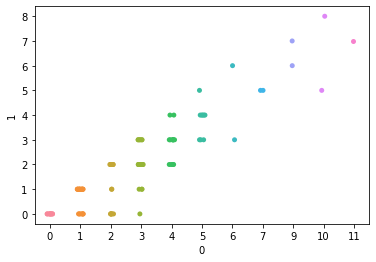

In [115]:
sns.stripplot(data=result1, x=result1[0], y=result1[1])

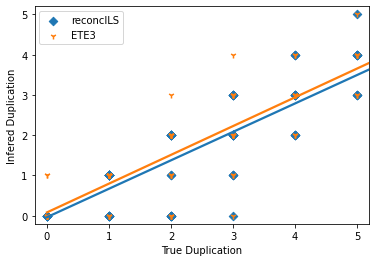

<Figure size 432x288 with 0 Axes>

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)

result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='ETE3')
#ax=sns.regplot(x=list(range(98)), y=list(range(98)), data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='ETE3')



plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

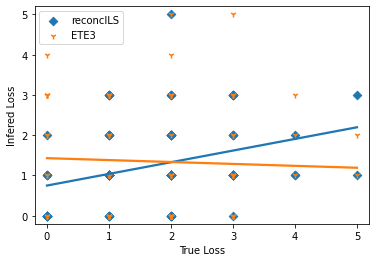

<Figure size 432x288 with 0 Axes>

In [117]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='ETE3')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

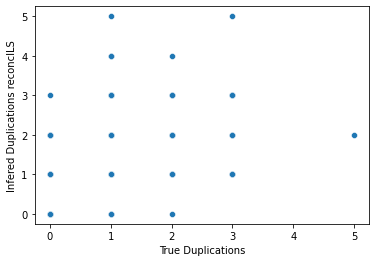

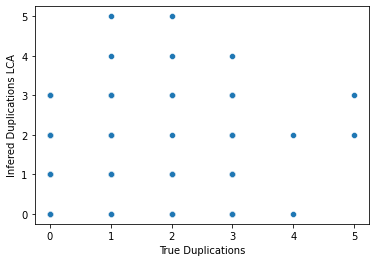

In [118]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

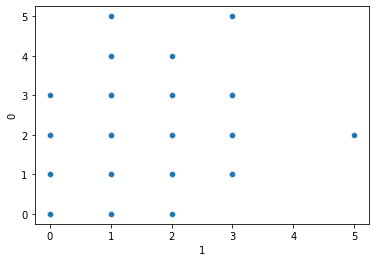

In [119]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [120]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['NNI']))

In [121]:
rho

-0.05905395878884171

In [122]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['NNI']))

In [123]:
rho

0.8720132272019546

In [124]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [125]:
rho

0.8810934748311946

In [126]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [127]:
rho

0.36867637900971995